In [2]:
# Import modules
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
id_flood=pd.read_csv('flood.CSV')
id_flood

,INDEX,watershed,POPULATION_2010,F_pop_atrisk,F_essentialfacilities_floodplain,F_dams,F_levees,F_risk,F_risk_level
0,1,americanfalls,77212,2935,0,5,8,750.1000,H
1,2,bear lake,9713,453,1,7,0,328.9000,H
2,3,beaver-camas,2403,408,0,0,0,68.6250,M
3,4,big lost,3998,632,1,1,0,116.6625,M
4,5,big wood,23221,1314,11,7,23,1174.1500,H
...,...,...,...,...,...,...,...,...,...
79,80,upper selway,0,0,0,0,0,2.2250,L
80,81,upper snake-rock,107887,2217,14,14,0,719.8500,H
81,82,upper spokane,99092,1608,0,7,3,560.2500,H
82,83,weiser,6771,1055,8,18,12,929.7750,H


In [4]:
id_flood=id_flood.drop(columns = ['INDEX', 'POPULATION_2010','F_risk','F_risk_level'])
id_flood

,watershed,F_pop_atrisk,F_essentialfacilities_floodplain,F_dams,F_levees
0,americanfalls,2935,0,5,8
1,bear lake,453,1,7,0
2,beaver-camas,408,0,0,0
3,big lost,632,1,1,0
4,big wood,1314,11,7,23
...,...,...,...,...,...
79,upper selway,0,0,0,0
80,upper snake-rock,2217,14,14,0
81,upper spokane,1608,0,7,3
82,weiser,1055,8,18,12


In [5]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
id_flood_min_max= scaler.fit_transform(id_flood[['F_pop_atrisk', 
                                                 'F_essentialfacilities_floodplain','F_dams','F_levees']].dropna())
id_flood_min_max=pd.DataFrame(id_flood_min_max,columns=['F_pop_atrisk', 
                                                    'F_essentialfacilities_floodplain','F_dams','F_levees'])

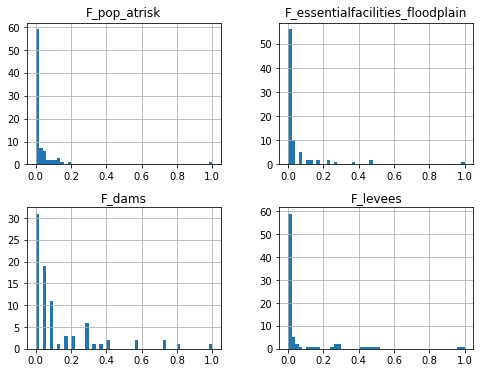

In [6]:
id_flood_min_max.hist(bins=50,figsize=(8, 6))
plt.savefig('flood_min_max_scale',dpi=600,bbox_inches = 'tight')

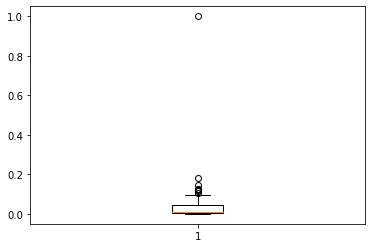

In [7]:
plt.boxplot(id_flood_min_max.loc[id_flood_min_max['F_pop_atrisk']>0,'F_pop_atrisk'])
plt.show()

In [8]:
Q1,Median,Q3,maximum = id_flood_min_max.loc[id_flood_min_max['F_pop_atrisk']>0,
                                            'F_pop_atrisk'].quantile([0.25,0.5,0.75,1])
id_flood_min_max['popatrisk_level']=0
id_flood_min_max.loc[id_flood_min_max['F_pop_atrisk']==0,'popatrisk_level']='Z'

id_flood_min_max.loc[(id_flood_min_max['F_pop_atrisk']<=Q1)& 
                     (id_flood_min_max['F_pop_atrisk']>0),'popatrisk_level']='L'

id_flood_min_max.loc[(id_flood_min_max['F_pop_atrisk']<=Median)& 
                     (id_flood_min_max['F_pop_atrisk']>Q1),'popatrisk_level']='ML'

id_flood_min_max.loc[(id_flood_min_max['F_pop_atrisk']<=Q3)& 
                     (id_flood_min_max['F_pop_atrisk']>Median),'popatrisk_level']='MH'

id_flood_min_max.loc[(id_flood_min_max['F_pop_atrisk']<=maximum)& 
                     (id_flood_min_max['F_pop_atrisk']>Q3),'popatrisk_level']='H'


id_flood_min_max

,F_pop_atrisk,F_essentialfacilities_floodplain,F_dams,F_levees,popatrisk_level
0,0.097063,0.000000,0.20,0.177778,H
1,0.014981,0.033333,0.28,0.000000,MH
2,0.013493,0.000000,0.00,0.000000,MH
3,0.020901,0.033333,0.04,0.000000,MH
4,0.043455,0.366667,0.28,0.511111,H
...,...,...,...,...,...
79,0.000000,0.000000,0.00,0.000000,Z
80,0.073318,0.466667,0.56,0.000000,H
81,0.053178,0.000000,0.28,0.066667,H
82,0.034890,0.266667,0.72,0.266667,MH
